In [1]:
import pandas as pd
import numpy as np

In [2]:
topex = np.fromfile('simulation_rate_3.dat')
df_topex = pd.DataFrame(data=topex, columns=["y"])
df_topex

y
0         -4.963476e-02
1         -2.473983e-03
2          4.776880e-04
3         -8.498417e-02
4          1.237463e+00
...                 ...
117964795 -5.129116e+05
117964796  1.484962e+04
117964797 -4.725297e+10
117964798 -3.687743e+09
117964799  3.567466e+09

[117964800 rows x 1 columns]

In [3]:
df_topex.loc[:, 'y'].mean()

8.059234431546939e+20

In [4]:
#df_topex["y"] = 1/df_topex["y"]

In [5]:
df_topex

y
0         -4.963476e-02
1         -2.473983e-03
2          4.776880e-04
3         -8.498417e-02
4          1.237463e+00
...                 ...
117964795 -5.129116e+05
117964796  1.484962e+04
117964797 -4.725297e+10
117964798 -3.687743e+09
117964799  3.567466e+09

[117964800 rows x 1 columns]

In [6]:
df_topex.describe()

y
count  1.179648e+08
mean   8.059234e+20
std    1.090365e+23
min   -1.733610e+25
25%   -1.128663e+10
50%   -2.354178e-07
75%    1.003094e+10
max    1.060447e+26

In [7]:
df_topex.iloc[:100]

y
0  -4.963476e-02
1  -2.473983e-03
2   4.776880e-04
3  -8.498417e-02
4   1.237463e+00
..           ...
95 -6.791669e-07
96  2.485031e-01
97 -4.495853e-04
98 -1.876604e-02
99 -4.143354e-08

[100 rows x 1 columns]

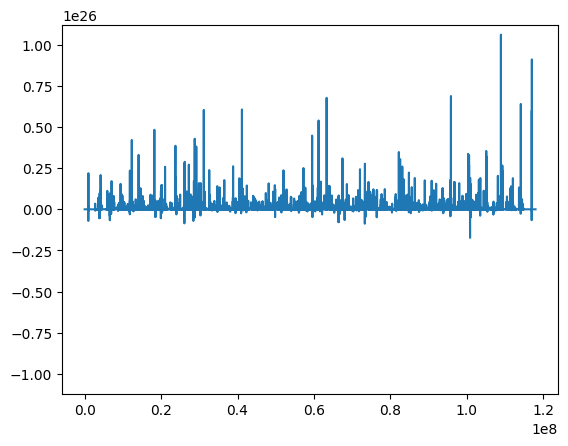

In [8]:
# importing the required module
import matplotlib.pyplot as plt


def symmetrize_y_axis(axes):
    y_max = np.abs(axes.get_ylim()).max()
    axes.set_ylim(ymin=-y_max, ymax=y_max)


fig, ax = plt.subplots()
x = range(df_topex["y"].size)
y = df_topex["y"]
  
ax.plot(x, y)
#ax.plot(x,-y)
symmetrize_y_axis(ax)

In [9]:
df_topex['y'][df_topex['y']<80]=0
df_topex['y'][df_topex['y']>250]=0

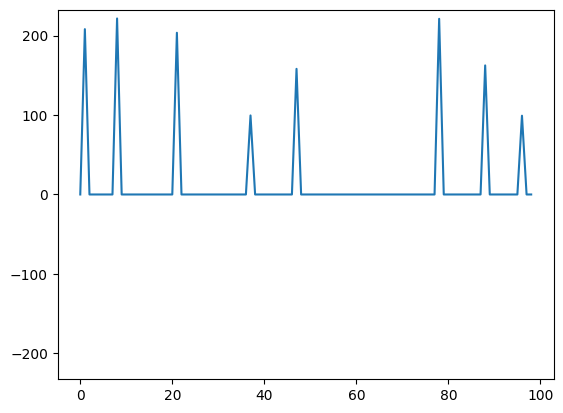

In [10]:
# importing the required module
import matplotlib.pyplot as plt


def symmetrize_y_axis(axes):
    y_max = np.abs(axes.get_ylim()).max()
    axes.set_ylim(ymin=-y_max, ymax=y_max)


for i in range(1,(df_topex['y'].size)//100):
    df_tmp = df_topex.iloc[(i-1)*100:(i*100)]
    if df_tmp.loc[:, 'y'].mean() > 14:
        fig, ax = plt.subplots()
        x = range(99)
        y = df_tmp.loc[df_tmp['y'] < df_tmp.loc[:, 'y'].max()]["y"]
        ax.plot(x, y)
        symmetrize_y_axis(ax)